<a href="https://colab.research.google.com/github/poohzaza166/tax-rnd-ocr/blob/Easy-OCR/Prim_Tax_OCR_easyocr_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.4 MB/s eta 0:00:00


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.63s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [ ]:
# list them
!ls -l

total 3508
-rw-r--r-- 1 root root   59898 Sep  4 11:42 chinese.jpg
-rw-r--r-- 1 root root   97910 Sep  4 11:42 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Sep  4 11:42 english.png
-rw-r--r-- 1 root root  487995 Sep  4 11:42 example2.png
-rw-r--r-- 1 root root  127454 Sep  4 11:42 example3.png
-rw-r--r-- 1 root root  488641 Sep  4 11:42 example.png
-rw-r--r-- 1 root root  168376 Sep  4 11:42 french.jpg
-rw-r--r-- 1 root root   42159 Sep  4 11:42 japanese.jpg
-rw-r--r-- 1 root root  225531 Sep  4 11:42 korean.png
drwxr-xr-x 1 root root    4096 Sep  8 13:24 sample_data
-rw-r--r-- 1 root root   82229 Sep  4 11:42 thai.jpg
-rw-r--r-- 1 root root   34706 Sep  4 11:42 width_ths.png


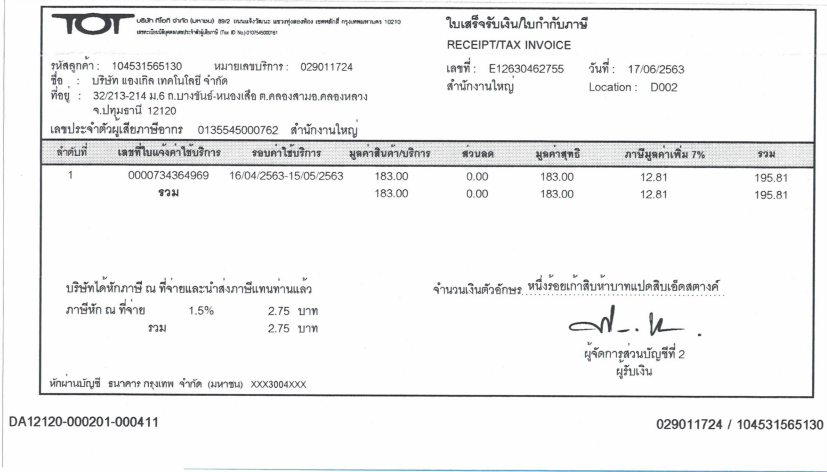

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/thai_receipt.png")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])
#reader = easyocr.Reader(['en'])

In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('/content/thai_receipt.png')
bounds

[([[136, 16], [214, 16], [214, 24], [136, 24]],
  'nาาวำราการน',
  0.006185737402017405),
 ([[232, 16], [402, 16], [402, 24], [232, 24]],
  'เกระมากชนะาทmนเmทอรmazอรทานรรวเา',
  1.1883140321339463e-05),
 ([[444, 12], [591, 12], [591, 33], [444, 33]],
  'ใบเสร็จรับเงิน/ใบกำกับภาษี',
  0.7398042156188601),
 ([[54, 12], [126, 12], [126, 38], [54, 38]], 'tot', 0.21951478719711304),
 ([[136, 28], [218, 28], [218, 36], [136, 36]],
  'เ.อรhอา.',
  0.00048341033989768246),
 ([[228, 26], [279, 26], [279, 38], [228, 38]],
  'e onasse',
  0.0036682010262681372),
 ([[447, 37], [575, 37], [575, 53], [447, 53]],
  'receipttax invoice',
  0.7244617659189928),
 ([[49, 59], [97, 59], [97, 75], [49, 75]], 'พฬักลุกคา', 0.163874096263289),
 ([[111, 59], [185, 59], [185, 73], [111, 73]],
  '104531565130',
  0.9919016432419034),
 ([[213, 59], [293, 59], [293, 73], [213, 73]],
  'ทมายเจมนริการ :',
  0.12741630862466186),
 ([[299, 61], [355, 61], [355, 75], [299, 75]],
  '023311724',
  0.9166922211305076),
 (

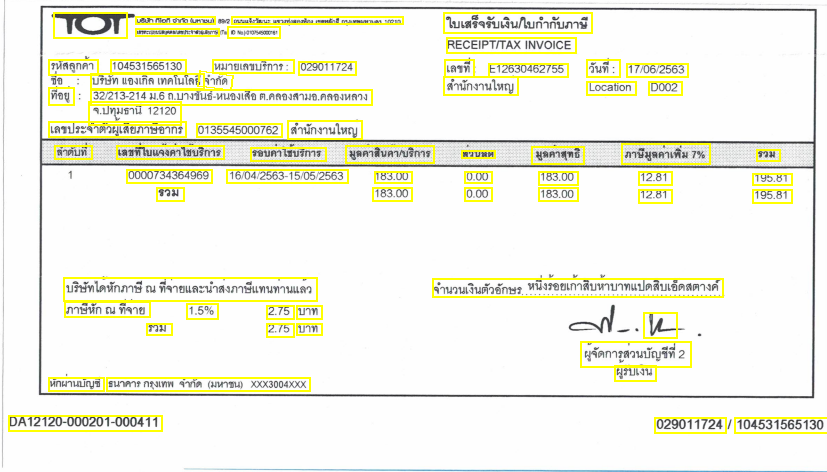

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('/content/test-real-receipt.png')
bounds

[([[394, 26], [563, 26], [563, 67], [394, 67]], 'SNAIOR', 0.8359502436565323),
 ([[394, 64], [560, 64], [560, 90], [394, 90]],
  'INTERNATIONAL',
  0.9680217813529108),
 ([[375, 117], [539, 117], [539, 133], [375, 133]],
  'Original Recelpt / Tax Invoice',
  0.8794067964828611),
 ([[51, 145], [81, 145], [81, 157], [51, 157]], 'Angle', 0.8408911581015492),
 ([[80, 142], [211, 142], [211, 159], [80, 159]],
  'Technology Co Lid (QQOOD)',
  0.5012023455578883),
 ([[375, 149], [447, 149], [447, 161], [375, 161]],
  'TAX INVOICE NO',
  0.6905861401327706),
 ([[466, 147], [523, 147], [523, 161], [466, 161]],
  'RVL20CG0371',
  0.24139643263203506),
 ([[49, 155], [131, 155], [131, 169], [49, 169]],
  '32/213-214 Moo',
  0.9608920326951459),
 ([[139, 157], [219, 157], [219, 171], [139, 171]],
  'Bangkhan-Nong -',
  0.7261645835487534),
 ([[50, 164], [111, 164], [111, 181], [50, 181]],
  'Khlorg Sam',
  0.7456492157747738),
 ([[145, 169], [179, 169], [179, 181], [145, 181]],
  'Luang',
  0.99806

In [ ]:
for bound in bounds:
  print(bound[1])

nาาวำราการน
เกระมากชนะาทmนเmทอรmazอรทานรรวเา
ใบเสร็จรับเงิน/ใบกำกับภาษี
tot
เ.อรhอา.
e onasse
receipttax invoice
พฬักลุกคา
104531565130
ทมายเจมนริการ :
023311724
เลาที
[12530452755
 วันที:
17/06 2563
บริษัท แองเกิล เทคโบโลยี
สำนักงานใหญ
 locaion
do02
ทีกยู
32/213-214 ม.6 ก.บางันธ์ แนางเผือ ต.ศลองสามก.คลองหลวง
จ.ปทมธานี 12120
เลาประจำหัวผเียภาษีอากร
0135545000762
สำนักงานใหญ
จ่าดับที
เาชท์ไบแวงคาใชบริการ
ราบทา.1บริการ
มุลคาสินคา/บริการ
สาบาา
มตศาสทธํ
ภาษีมูลคาเทิ่ม 7%
ราบ
0000734364969
16/04/2563-15 05 2563
183.00
dกา
183 00
12.81
195.81
รวม
183.00
dดว
183.00
12.81
195.81
บริษัทใดหักภาษีณฺที่จายและนำสงภาษีแทนทานแลว
จำนวนเงินดัวอักษม.ฆนึงรอยเกาสิบหาบาทแปดสิบเอ็ดสดางค์
ภาษีหักฺณฑีจาย
1.5%
2.75
บาท
ราม
2.75
บา
vi
ผุจัดการูสวนบัญชีที่ 2
ผุรับเงืน
พักผานบัญชิ
ธนาคารกรุงเทพกำนำฺามนารน) xx3on  xx
da12120-000201-000411
029011724
104531565130
เจากา


In [ ]:
for bound in bounds:
  print(bound[1])

SNAIOR
INTERNATIONAL
Original Recelpt / Tax Invoice
Angle
Technology Co Lid (QQOOD)
TAX INVOICE NO
RVL20CG0371
32/213-214 Moo
Bangkhan-Nong -
Khlorg Sam
Luang
CUSTOMER
AAUECPTH
Pathum Thani
PAID DATE
0-Jun-20
12120
INVOICE NO;
56cjozjbt?
RECEIPT REF
bBconITRA
SHHIPMENT
320AS  7037679
HOUSE BILL NO
SIN03O3679
MASTER DILL NO
71259971557
PRINTED BY
Pens Somkaein
PRINTED CN
r=A
OFFCE
Bangkot
Customer Tax ID:
0135545000762
descaipticn
AMOUNT (No VAT]
RATE
AKDUNT IExdlW
Celrey Order Fee
70D %
700 0
TOTALS
700.00
suatotm
T0U.Qu
WITHHOLDING TAX AMOUNT:
THB
ECO YAT
49.00
TOTAL
THB
749. 00
@unsiet Funds
IBAN
SwIFT
DKKATHBK
Bank Code: 0Jz
Hank Branchs
BANGCHAX (01791
lcridunt
1793052355
BANGKOK BANK PUFLIC COVPANY LIVITED
44ei
333, SILOM ROAD; BANGRAK RANGKOK 10510 THAILAND
Sthalur
Intcrnaliunal Lozistics Lid
Pay Rel:
16600033673
Trangaction Ret:
Av0&
SEMATOR NTERNAIONAL Lozrca 
JHEAD OTFKEL
Fie Liss Ciobal Lopishca
eorerulet
ci Lid @tins
I7 CunGnettl
B44AL
7R
to tht t
Hont4Iul tne Cutlomer *In t

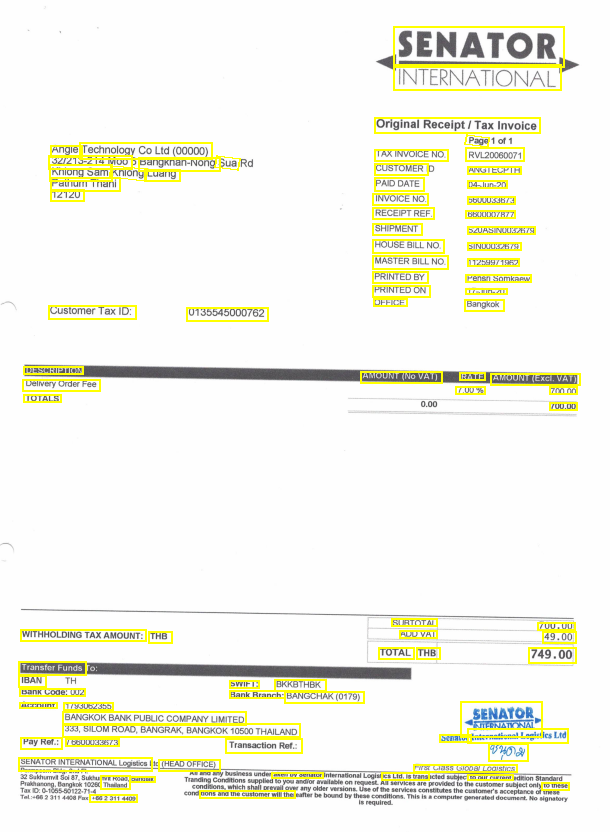

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)